In [1]:
import torch
import numpy as np

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [2]:
# import package

# model
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch import optim
from torch.optim.lr_scheduler import StepLR

# dataset and transformation
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import os
from torchvision import models
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import Subset

# display images
from torchvision import utils
import matplotlib.pyplot as plt
%matplotlib inline


# utils
import numpy as np
from torchsummary import summary
import time
import copy

import os
from tqdm.notebook import tqdm
from warnings import filterwarnings
filterwarnings('ignore')

import torch
from torch import nn, optim
from torch.backends import cudnn
cudnn.benchmark = True
from randaugment import RandAugment, ImageNetPolicy
from torch.autograd import Variable


import timm
from timm.data.transforms_factory import create_transform
from timm.data.dataset_factory import create_dataset
from timm.data.mixup import Mixup

import pandas as pd

import random
import pandas as pd
import numpy as np
import os
import re
import glob
import cv2

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import torchvision.models as models

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from tqdm import tqdm
from timm.data.mixup import Mixup

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 예시로 'NanumGothic'을 사용

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
# df = pd.read_csv("../data/train.csv")
# train,val,_,_ = train_test_split(df,df['label'], test_size=0.2, stratify=df['label'], random_state=42)

In [4]:
# le = preprocessing.LabelEncoder() # 라벨인코딩 /라벨(목표 변수)를 정수로 인코딩
# # train, label의 라벨인코딩 과정 진행
# train['label'] = le.fit_transform(train['label'])
# val['label'] = le.transform(val['label'])

In [5]:
# df = train
# df

In [6]:
import shutil

# 이미지를 분류할 함수를 정의합니다.
def classify_images(dataframe, source_root, dest_root):
    # 레이블에 해당하는 폴더가 없으면 생성합니다.
    for label in dataframe['label'].unique():
        folder = os.path.join(dest_root, str(label))
        if not os.path.exists(folder):
            os.makedirs(folder)

    # 각 이미지 파일을 해당 레이블 폴더로 이동시킵니다.
    for idx, row in dataframe.iterrows():
        source_path = os.path.join(source_root, row['img_path'])
        dest_path = os.path.join(dest_root, str(row['label']), os.path.basename(row['img_path']))
        shutil.move(source_path, dest_path)

In [7]:
# # 함수를 호출하여 이미지 파일들을 분류합니다.
# source_root = '' # 원본 이미지 파일들이 있는 경로로 바꿔주세요.
# dest_root = '../data/sorted_images' # 분류된 이미지 파일들을 저장할 상위 경로로 바꿔주세요.
# classify_images(df, source_root, dest_root)

In [8]:
# # 데이터셋의 루트 디렉토리 경로를 설정합니다.
# dataset_root = '../data/sorted_images'
# 
# # 훈련 세트와 검증 세트를 저장할 디렉토리 경로를 설정합니다.
# train_dir = '../data/train'
# val_dir = '../data/val'
# 
# 
# # 레이블별로 데이터를 분할하고, 각각의 폴더에 파일을 이동하는 함수를 정의합니다.
# def split_dataset(dataset_root, train_dir, val_dir, val_ratio=0.2):
#     labels = os.listdir(dataset_root)  # 레이블 목록을 가져옵니다.
# 
#     for label in labels:
#         # 현재 레이블의 이미지 파일들이 있는 폴더 경로를 정의합니다.
#         label_dir = os.path.join(dataset_root, label)
# 
#         # 해당 레이블 폴더의 모든 이미지 파일 목록을 가져옵니다.
#         files = os.listdir(label_dir)
# 
#         # 훈련 세트와 검증 세트로 분할합니다.
#         train_files, val_files = train_test_split(files, test_size=val_ratio)
# 
#         # 각 파일을 새로운 'train'과 'val' 폴더로 이동합니다.
#         for f in train_files:
#             source_file = os.path.join(label_dir, f)
#             dest_dir = os.path.join(train_dir, label)
#             if not os.path.exists(dest_dir):
#                 os.makedirs(dest_dir)
#             shutil.move(source_file, os.path.join(dest_dir, f))
# 
#         for f in val_files:
#             source_file = os.path.join(label_dir, f)
#             dest_dir = os.path.join(val_dir, label)
#             if not os.path.exists(dest_dir):
#                 os.makedirs(dest_dir)
#             shutil.move(source_file, os.path.join(dest_dir, f))
# 
# # 함수를 호출하여 데이터셋 분할을 수행합니다.
# split_dataset(dataset_root, train_dir, val_dir)

In [9]:
from PIL import Image
import os

def resize_images(source_dir, target_dir, new_size=(224, 224)):
    """
    source_dir에서 이미지를 불러와 target_dir에 지정된 크기로 조정하여 저장합니다.
    이미지는 라벨별 폴더 구조를 유지하면서 저장됩니다.
    """
    # source_dir 내의 모든 폴더(라벨)을 탐색
    for label in os.listdir(source_dir):
        label_dir = os.path.join(source_dir, label)
        target_label_dir = os.path.join(target_dir, label)
        if not os.path.exists(target_label_dir):
            os.makedirs(target_label_dir)

        # 각 라벨 폴더 내의 모든 이미지 파일에 대해
        for filename in os.listdir(label_dir):
            if filename.endswith(('png', 'jpg', 'jpeg', 'bmp')):
                file_path = os.path.join(label_dir, filename)
                # 이미지 불러오기
                with Image.open(file_path) as img:
                    # 이미지를 새로운 크기로 조정
                    img_resized = img.resize(new_size, Image.BICUBIC)
                    # 조정된 이미지를 새로운 경로에 저장
                    img_resized.save(os.path.join(target_label_dir, filename))

# 사용 예:
source_directory = '../data/train'
target_directory = '../data/train256'
resize_images(source_directory, target_directory)

KeyboardInterrupt: 

In [10]:
tfm = create_transform(256, mean =[0.485,0.456, 0.406], std=[0.229,0.224,0.225] )
# tfm = create_transform(224, is_training=True, auto_augment='rand-m6-mstd0.5', mean =[0.485,0.456, 0.406], std=[0.229,0.224,0.225] )
train_ds = create_dataset(name= '', root='../data/train256', transform = tfm)
val_ds = create_dataset(name= '', root='../data/val256', transform = create_transform(256))

# create DataLoader
train_dl = DataLoader(train_ds, batch_size=12, shuffle=True, num_workers=6)
val_dl = DataLoader(val_ds, batch_size=12, shuffle=False, num_workers=6)

In [11]:
# # Mixup 인자 설정
# mixup_args = {
#     'mixup_alpha': 1.,
#     'cutmix_alpha': 1.,
#     'prob': 0.5,
#     'switch_prob': 0.5,
#     'label_smoothing': 0.1,
#     'num_classes': 25
# }
# 
# # Mixup 객체 생성
# mixup_fn = Mixup(**mixup_args)
# 
# class MixupDataLoader(DataLoader):
#     def __init__(self, *args, mixup_fn, **kwargs):
#         super().__init__(*args, **kwargs)
#         self.mixup_fn = mixup_fn
# 
#     def __iter__(self):
#         for batch in super().__iter__():
#             inputs, targets = batch
#             inputs, targets = inputs.to('cuda'), targets.to('cuda')
#             mixed_inputs, mixed_targets = self.mixup_fn(inputs, targets)
#             yield mixed_inputs, mixed_targets

In [12]:
# train_dl = MixupDataLoader(train_ds, mixup_fn=mixup_fn, batch_size=64, shuffle=True, num_workers=6)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# DataLoader에서 데이터를 가져옵니다.
dataiter = iter(train_dl)
images, labels = next(dataiter)

# 이미지를 CPU로 옮긴 후 NumPy 배열로 변환합니다.
images = images.cpu().numpy()

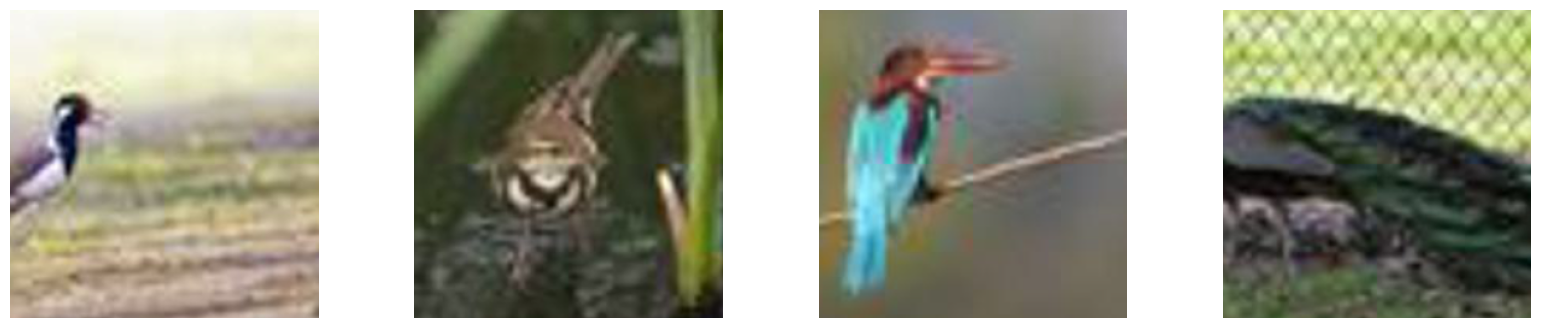

In [14]:
# 이미지 표시 함수를 정의합니다.
def imshow(img):
    # [C, H, W]를 [H, W, C]로 변경합니다.
    img = img.transpose((1,2,0))
    # 표준화된 데이터를 원본 범위로 되돌립니다.
    mean = np.array([0.485,0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = img * std + mean
    # 이미지의 범위가 [0, 1]이 되도록 클리핑합니다.
    img = np.clip(img, 0, 1)
    # 이미지를 표시합니다.
    plt.imshow(img)

# 이미지를 표시합니다.
plt.figure(figsize=(20, 4))
for i in range(4):
    ax = plt.subplot(1, 4, i+1)
    imshow(images[i])
    # ax.set_title(f'Label: {labels[i]}') # 여기서 labels[i].item()을 사용하여 레이블을 스칼라로 변환합니다.
    plt.axis('off') # 축을 표시하지 않습니다.
plt.show()

In [16]:
timm.list_models()

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_base_patch16_224_in22k',
 'beitv2_large_patch16_224',
 'beitv2_large_patch16_224_in22k',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw

In [16]:
model = timm.create_model('swinv2_base_window16_256', pretrained=True, num_classes=25)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

summary(model, (3,256,256))

Downloading: "https://github.com/SwinTransformer/storage/releases/download/v2.0.0/swinv2_base_patch4_window16_256.pth" to C:\Users\SJ/.cache\torch\hub\checkpoints\swinv2_base_patch4_window16_256.pth


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 64, 64]           6,272
         LayerNorm-2            [-1, 4096, 128]             256
        PatchEmbed-3            [-1, 4096, 128]               0
           Dropout-4            [-1, 4096, 128]               0
            Linear-5          [-1, 31, 31, 512]           1,536
              ReLU-6          [-1, 31, 31, 512]               0
            Linear-7            [-1, 31, 31, 4]           2,048
           Softmax-8          [-1, 4, 256, 256]               0
           Dropout-9          [-1, 4, 256, 256]               0
           Linear-10             [-1, 256, 128]          16,512
          Dropout-11             [-1, 256, 128]               0
  WindowAttention-12             [-1, 256, 128]               0
        LayerNorm-13            [-1, 4096, 128]             256
         Identity-14            [-1, 40

In [17]:
loss_func = nn.CrossEntropyLoss(reduction='sum')
opt = optim.AdamW(model.parameters(), lr=0.0001)

from torch.optim.lr_scheduler import ReduceLROnPlateau
# lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor=0.5, patience=3)
lr_scheduler = StepLR(opt, step_size=1, gamma=0.8)

In [18]:
# function to get current lr
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

def metric_batch(output, target):
    # target이 원-핫 인코딩된 형태라면, 클래스의 개수에 맞게 변환
    if target.size(1) != output.size(1):
        target = F.one_hot(target, num_classes=output.size(1)).to(output.dtype)

    mse = F.mse_loss(output, target, reduction='none').mean(1)  # 각 샘플에 대한 MSE 계산
    return mse.mean().item()  # 배치에 대한 평균 MSE 반환

# function to calculate loss per mini-batch
def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)
    metric_b = metric_batch(output, target)

    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_dl.dataset)

    for xb, yb in dataset_dl:

        xb = xb.to(device)
        yb = yb.to(device)
        output = model(xb)

        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)

        running_loss += loss_b

        if metric_b is not None:
            running_metric += metric_b

        if sanity_check is True:
            break

    loss = running_loss / len_data
    metric = running_metric / len_data

    return loss, metric

In [19]:
def train(model, loss_func, optimizer, train_loader, epochs, device):
    model.to(device)
    start_time = time.time()


    for epoch in range(epochs):
        model.train()
        total_loss = 0
        current_lr = get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch+1,epochs, current_lr))

        for batch in train_loader:
            inputs, targets = batch
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = loss_func(outputs, targets)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        lr_scheduler.step()

        avg_loss = total_loss / len(train_loader)
        print(f'Loss: {avg_loss:.4f}, Time: {((time.time()-start_time)/60):.6f}')
        print('-------------------------------')

In [20]:
train(model, loss_func, opt, train_dl, 20, device = device)

Epoch 1/20, current lr=0.0001
Loss: 7.1619, Time: 10.875674
-------------------------------
Epoch 2/20, current lr=8e-05
Loss: 1.5823, Time: 22.571446
-------------------------------
Epoch 3/20, current lr=6.400000000000001e-05
Loss: 0.6734, Time: 34.116286
-------------------------------
Epoch 4/20, current lr=5.120000000000001e-05
Loss: 0.2912, Time: 45.214803
-------------------------------
Epoch 5/20, current lr=4.0960000000000014e-05
Loss: 0.0370, Time: 57.553449
-------------------------------
Epoch 6/20, current lr=3.2768000000000016e-05
Loss: 0.0347, Time: 73.404526
-------------------------------
Epoch 7/20, current lr=2.6214400000000015e-05
Loss: 0.0740, Time: 85.127115
-------------------------------
Epoch 8/20, current lr=2.0971520000000012e-05


KeyboardInterrupt: 

In [21]:
# 테스트 데이터셋에 대한 모델의 정확도를 계산하는 함수
def evaluate_model(model, test_loader):
    model.eval()  # 모델을 평가 모드로 설정
    running_corrects = 0

    # 기울기 계산을 비활성화

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

    # 전체 정확도 계산
    accuracy = running_corrects.double() / len(test_loader.dataset)
    print(f'Test Accuracy: {accuracy:.4f}')

# 테스트 데이터셋을 사용하여 모델 평가
evaluate_model(model, val_dl)

Test Accuracy: 0.9312
